In [2]:
import nltk
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import brown, treebank, conll2000
from textwrap import wrap
from nltk.probability import ConditionalFreqDist, ConditionalProbDist, FreqDist

In [3]:
def sent_accuracy(preds, labels):
    accuracies = []
    for i in range(len(preds)):
        actual = labels[i]
        acc = 0
        for j in range(len(preds[i])):
            if preds[i][j] == actual[j]:
                acc += 1
        if len(preds[i]) > 0:
            acc = acc / len(preds[i])
        accuracies.append(acc)
    return accuracies

In [6]:
pred_garden = []
with open('hmm/pred_garden.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        pred_garden.append(tokens)

actual_garden = []
with open('data/labels_garden.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        actual_garden.append(tokens)
        
garden_accs = sent_accuracy(pred_garden, actual_garden)
garden_accs

[0.6666666666666666,
 0.4,
 0.875,
 1.0,
 0.8571428571428571,
 0.8571428571428571,
 0.5,
 0.625,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.6666666666666666,
 0.8888888888888888,
 0.6,
 0.7142857142857143,
 0.8333333333333334,
 0.7142857142857143]

In [7]:
pred_normal = []
with open('hmm/pred_normal.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        pred_normal.append(tokens)

actual_normal = []
with open('data/labels_normal.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        actual_normal.append(tokens)
        
normal_accs = sent_accuracy(pred_normal, actual_normal)
normal_accs

[1.0,
 1.0,
 0.8333333333333334,
 0.8888888888888888,
 1.0,
 0.625,
 1.0,
 1.0,
 0.8571428571428571,
 0.8333333333333334,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0.7142857142857143,
 0.8333333333333334,
 0.8888888888888888,
 1.0,
 1.0]

Text(0.5, 1.0, 'Accuracy of HMM predictions of garden-path sentences')

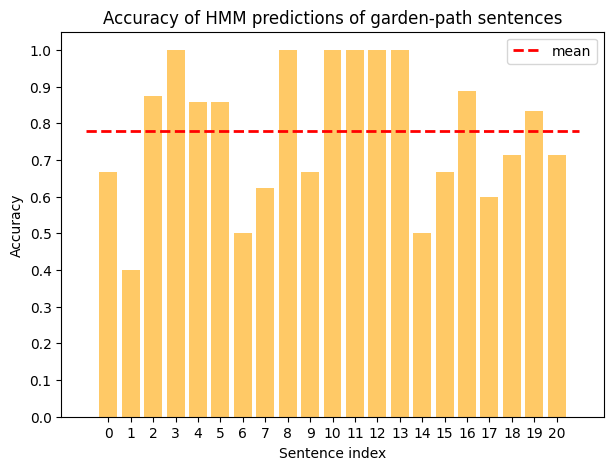

In [52]:
# Plot garden-path sentences
fig = plt.figure(figsize=(7, 5))
sent_inds = np.arange(0, 21)
plt.bar(sent_inds, garden_accs, color='orange', alpha=0.6)
garden_mean = [np.mean(garden_accs)] * 23
plt.plot(np.arange(-1, 22), garden_mean, color='red', linestyle='--', label='mean', linewidth=2)
plt.legend()
plt.xticks(sent_inds)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Sentence index")
plt.ylabel("Accuracy")
plt.title('\n'.join(
    wrap("Accuracy of HMM predictions of garden-path sentences", 60)))

Text(0.5, 1.0, 'Accuracy of HMM predictions of normal sentences')

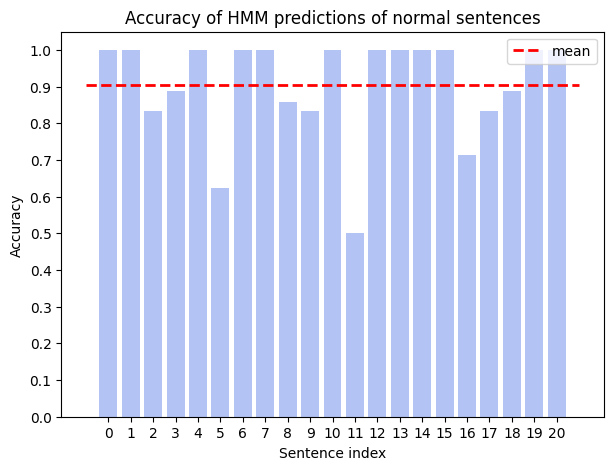

In [53]:
# Plot normal sentences
fig = plt.figure(figsize=(7, 5))
sent_inds = np.arange(0, 21)
plt.bar(sent_inds, normal_accs, color='royalblue', alpha=0.4)
normal_mean = [np.mean(normal_accs)] * 23
plt.plot(np.arange(-1, 22), normal_mean, color='red', linestyle='--', label='mean', linewidth=2)
plt.legend()
plt.xticks(sent_inds)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Sentence index")
plt.ylabel("Accuracy")
plt.title('\n'.join(
    wrap("Accuracy of HMM predictions of normal sentences", 60)))

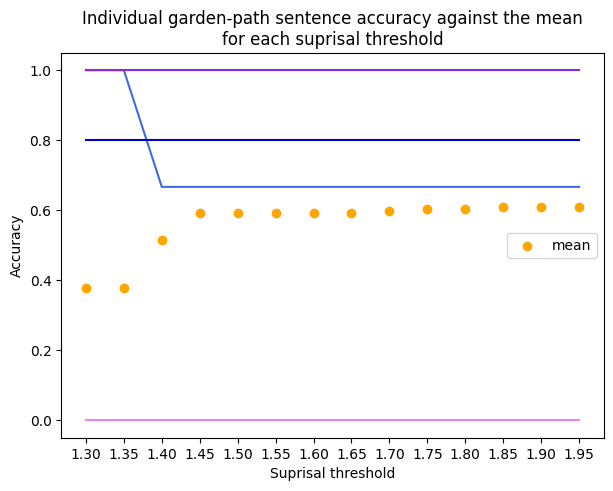

In [75]:
# Plot individual accuracy values against mean accuracy
fig = plt.figure(figsize=(7,5))
t = np.arange(12)
colors = ['royalblue', 'mediumblue', 'blueviolet',
          'violet', 'purple', 'mediumvioletred', 'deeppink']

garden_sent_accs = [[] for i in range(21)]
for acc in garden_accs:
    for i in range(21):
        garden_sent_accs[i].append(acc[i])

chosen_garden = [garden_sent_accs[i] for i in [0, 1, 12, 18]]
for i in range(len(chosen_garden)):
    plt.plot(supr_range, chosen_garden[i], color=colors[i])
# Plot means

plt.scatter(supr_range, mean_garden_accs, color='orange', label='mean')
plt.xticks(supr_range)
plt.xlabel("Suprisal threshold")
plt.ylabel("Accuracy")
plt.title('\n'.join(
    wrap("Individual garden-path sentence accuracy against the mean for each suprisal threshold", 60)))
plt.legend()

In [ ]:
# set range for the surprisal values allowed
# find the value that generates minimal error (grid/line search)
# use normalized suprisal / div by number of elements